<a href="https://colab.research.google.com/github/povashraful/Research_paper_implementation/blob/main/Transformer_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

# **Input Embeddings**


## org

In [ ]:
# all the important liberires from pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter


import math


#HuggingFace linraries
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace


#pathlib
from pathlib import Path


#typing
from typing import Any

#Library for progress bars in loops
from tqdm import tqdm


#importing library of warnings
import warnings

In [ ]:
class InputEmbedding(nn.Module):
    def __init__(self, d_model:int, vocab_size:int):
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model)

## my code

In [ ]:
 ## May delete later :

##trying the code by myself *using the logic*


# 1-  we initialize a class and we assigned InputEmbeddings as class name- we can name it whatever we like but it is best to name it according to the block names
# 2- we then call our super instructor where we give three parameters - self, d_model (dimentions of the model) and vocab size (total unique words present in the data)

class InputEmbeddings (nn.Module):
  def __init__(self, d_model, vocab_size):
    super().__init__()
    self.d_model = d_model
    self.vocab_size = vocab_size
    self.embedding = nn.embedding(d_model, vocab_size)


  def forward(self, x):
    return self.embedding(x) * math.sqrt(self.d_model)


Let us see an overview of how this works

In [ ]:
import torch
import torch.nn as nn
import math

# Step 1: define vocabulary size and embedding dimension
vocab_size = 4
d_model = 4

# Step 2: Create embedding layer (randomly initialized)
embedding_layer = nn.Embedding(vocab_size, d_model)

# Step 3: Input word IDs (e.g., 'cat' = 0, 'dog' = 1)
input_ids = torch.tensor([0, 1, 2, 3])  # batch of 4 words

# Step 4: Get their vectors
embeddings = embedding_layer(input_ids) * math.sqrt(d_model)

print("Input IDs:", input_ids)
print("Embedding vectors:\n", embeddings)


Input IDs: tensor([0, 1, 2, 3])
Embedding vectors:
 tensor([[ 0.7676, -2.4067,  1.3026,  1.5257],
        [ 0.3862,  0.5135,  2.2603,  2.4203],
        [ 0.9949,  1.8450,  2.2928, -1.4773],
        [-1.3355, -2.3178, -2.7189, -0.4904]], grad_fn=<MulBackward0>)


In [ ]:
embedding_layer

Embedding(4, 4)

# **Positional Endocoding**

## my code


In [ ]:
import torch
import torch.nn as nn
import math

In [ ]:
d_model = 6
max_sequence_length=11

In [ ]:
# lets create a matrix

pe = torch.zeros(max_sequence_length, d_model) # rows, col

In [ ]:
pe # this is for embeddings position

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
pos = torch.arange(max_sequence_length, dtype=torch.float)

In [ ]:
pos # this is for words position

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
pos = pos.reshape(max_sequence_length, 1)

In [ ]:
pos

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [ ]:
pos = pos.unsqueeze(1) # better than reshape
pos

tensor([[[ 0.]],

        [[ 1.]],

        [[ 2.]],

        [[ 3.]],

        [[ 4.]],

        [[ 5.]],

        [[ 6.]],

        [[ 7.]],

        [[ 8.]],

        [[ 9.]],

        [[10.]]])

In [ ]:
# so now, we have  6 (d_model) x   11 (embeddings)

In [ ]:
even_i = torch.arange(0,d_model,2)

# so it will work this numbers from 0 to the range of (d_model-1), which is 5.
#In addition, we have given step size = 2
# so, - 0,1,2,3,4,5   -> 0,2,4
#

In [ ]:
even_i

tensor([0, 2, 4])

In [ ]:
even_denominator = torch.pow(10000, even_i/d_model)

In [ ]:
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
odd_i = torch.arange(1, d_model, 2)
odd_i

tensor([1, 3, 5])

In [ ]:
odd_donominator = torch.pow(10000, (odd_i-1)/d_model)
odd_donominator

tensor([  1.0000,  21.5443, 464.1590])

If we notice, the output of both dominators (even and odd) are the same- So, we can use either one or we can rename them as just dominator

In [ ]:
donominator = torch.pow(10000, even_i/d_model)

In [ ]:
donominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
even_PE = torch.sin (pos/donominator)
even_PE

tensor([[[ 0.0000,  0.0000,  0.0000]],

        [[ 0.8415,  0.0464,  0.0022]],

        [[ 0.9093,  0.0927,  0.0043]],

        [[ 0.1411,  0.1388,  0.0065]],

        [[-0.7568,  0.1846,  0.0086]],

        [[-0.9589,  0.2300,  0.0108]],

        [[-0.2794,  0.2749,  0.0129]],

        [[ 0.6570,  0.3192,  0.0151]],

        [[ 0.9894,  0.3629,  0.0172]],

        [[ 0.4121,  0.4057,  0.0194]],

        [[-0.5440,  0.4477,  0.0215]]])

In [ ]:
even_PE.shape

torch.Size([11, 1, 3])

In [ ]:
odd_PE = torch.cos (pos/donominator)
odd_PE

tensor([[[ 1.0000,  1.0000,  1.0000]],

        [[ 0.5403,  0.9989,  1.0000]],

        [[-0.4161,  0.9957,  1.0000]],

        [[-0.9900,  0.9903,  1.0000]],

        [[-0.6536,  0.9828,  1.0000]],

        [[ 0.2837,  0.9732,  0.9999]],

        [[ 0.9602,  0.9615,  0.9999]],

        [[ 0.7539,  0.9477,  0.9999]],

        [[-0.1455,  0.9318,  0.9999]],

        [[-0.9111,  0.9140,  0.9998]],

        [[-0.8391,  0.8942,  0.9998]]])

In [ ]:
odd_PE.shape

torch.Size([11, 1, 3])

 Let us see how Stack works


In [ ]:
x = torch.arange(0,5) # num of colms
x

tensor([0, 1, 2, 3, 4])

In [ ]:
torch.stack([x,x]) # number of rows

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [ ]:
test = torch.stack([x,x,x,x,x])

In [ ]:
test

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [ ]:
test.shape

torch.Size([5, 5])

Now let us apply stack

In [ ]:
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked

tensor([[[[ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  1.0000,  1.0000]]],


        [[[ 0.8415,  0.0464,  0.0022],
          [ 0.5403,  0.9989,  1.0000]]],


        [[[ 0.9093,  0.0927,  0.0043],
          [-0.4161,  0.9957,  1.0000]]],


        [[[ 0.1411,  0.1388,  0.0065],
          [-0.9900,  0.9903,  1.0000]]],


        [[[-0.7568,  0.1846,  0.0086],
          [-0.6536,  0.9828,  1.0000]]],


        [[[-0.9589,  0.2300,  0.0108],
          [ 0.2837,  0.9732,  0.9999]]],


        [[[-0.2794,  0.2749,  0.0129],
          [ 0.9602,  0.9615,  0.9999]]],


        [[[ 0.6570,  0.3192,  0.0151],
          [ 0.7539,  0.9477,  0.9999]]],


        [[[ 0.9894,  0.3629,  0.0172],
          [-0.1455,  0.9318,  0.9999]]],


        [[[ 0.4121,  0.4057,  0.0194],
          [-0.9111,  0.9140,  0.9998]]],


        [[[-0.5440,  0.4477,  0.0215],
          [-0.8391,  0.8942,  0.9998]]]])

In [ ]:
stacked.shape

torch.Size([11, 1, 2, 3])

In [ ]:
# now we also need to flatten it- and make it 1 dimensional

In [ ]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)

In [ ]:
PE

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 1.0000,  1.0000,  1.0000]],

        [[ 0.8415,  0.0464,  0.0022],
         [ 0.5403,  0.9989,  1.0000]],

        [[ 0.9093,  0.0927,  0.0043],
         [-0.4161,  0.9957,  1.0000]],

        [[ 0.1411,  0.1388,  0.0065],
         [-0.9900,  0.9903,  1.0000]],

        [[-0.7568,  0.1846,  0.0086],
         [-0.6536,  0.9828,  1.0000]],

        [[-0.9589,  0.2300,  0.0108],
         [ 0.2837,  0.9732,  0.9999]],

        [[-0.2794,  0.2749,  0.0129],
         [ 0.9602,  0.9615,  0.9999]],

        [[ 0.6570,  0.3192,  0.0151],
         [ 0.7539,  0.9477,  0.9999]],

        [[ 0.9894,  0.3629,  0.0172],
         [-0.1455,  0.9318,  0.9999]],

        [[ 0.4121,  0.4057,  0.0194],
         [-0.9111,  0.9140,  0.9998]],

        [[-0.5440,  0.4477,  0.0215],
         [-0.8391,  0.8942,  0.9998]]])

In [ ]:
PE.shape

torch.Size([11, 2, 3])

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float):
        super().__init__()
        self.d_model = d_model #
        self.seq_len = seq_len
        self.dropout = nn.Dropout(dropout)


        pe = torch.zeros(seq_len, d_model)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1)
        # div term  = denominator - name has been replaced by
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self,x):

        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x)

## org

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = seq_len # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting

        # Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
        pe = torch.zeros(seq_len, d_model)

        # Creating a tensor representing positions (0 to seq_len - 1)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1) # Transforming 'position' into a 2D tensor['seq_len, 1']

        # Creating the division term for the positional encoding formula
        # div term  = denominator - name has been replaced by
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices in pe
        pe[:, 0::2] = torch.sin(position * div_term)
        # Apply cosine to odd indices in pe
        pe[:, 1::2] = torch.cos(position * div_term)

        # Adding an extra dimension at the beginning of pe matrix for batch handling
        pe = pe.unsqueeze(0)

        # Registering 'pe' as buffer. Buffer is a tensor not considered as a model parameter
        self.register_buffer('pe', pe)

    def forward(self,x):
        # Addind positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) # Dropout for regularization

# **Attention Mechanism**

The input consists of queries and keys of dimension dk <br>

q = d_k
k = d_k
<br>

and values of dimensions dv
<br>

v = d_v

## My Code


In [ ]:
import numpy as np
import math

The animal didnt cross the street because it was too tired

 d_model = 512

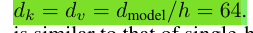

As we cannot visualize 512 - we will take small dimensions to understand simply <br>

therefore, for now, we will be using dimensions = 6

In [ ]:
d_k = 6
d_v = 6

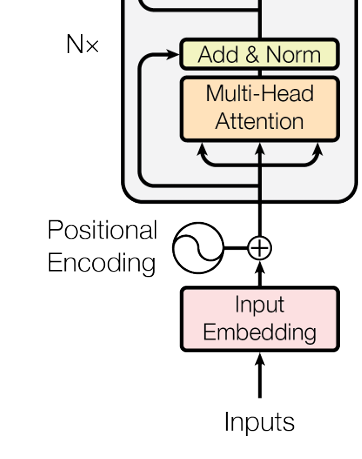

max_sequence_length = 11
L =11

In [ ]:
L, d_k, d_v = 11,6,6

In [ ]:
q = np.random.randn(L,d_k)
# 11 lines (sequence length),
# 6 dimensions (dimension of q) -  random numbers
q

array([[ 2.27244242,  0.32074838, -0.01179681, -0.95709987,  0.94306021,
        -1.47626035],
       [ 0.76374844, -0.00649   ,  0.591404  ,  0.97783958, -0.76088895,
        -0.83769915],
       [ 0.19599601, -0.55762071, -1.20503846,  0.67065373,  1.2478474 ,
        -0.67913571],
       [ 2.62450168,  0.80743323,  0.05928458,  1.23267635,  1.25196014,
        -0.19064702],
       [-0.94992906, -1.14565461,  0.19759534, -0.1727497 , -2.37279984,
         0.86823559],
       [-0.37766452,  0.81543272,  1.58764011,  0.60565647,  0.00325318,
        -0.90534703],
       [-2.70371441,  1.99021009, -1.08004001, -2.15781564,  2.0018626 ,
        -0.21338378],
       [ 0.02598425,  0.20231631, -0.86190703, -0.12221068,  0.24428948,
         1.0586363 ],
       [-2.0011933 ,  0.62484402,  0.36049702,  0.63425369, -0.3174864 ,
         0.44905072],
       [-0.55223546, -0.32242639,  1.42393932, -0.45005392,  0.76043736,
         1.59782998],
       [-1.19204532,  2.2776962 , -0.91945414, -2.

In [ ]:
k = np.random.randn(L,d_k) # 11 lines (sequence length),
# 6 dimensions (dimension of k) -  random numbers
k

array([[-0.34171794,  1.65512974,  0.55894166, -0.81855166,  1.61125369,
        -0.69458491],
       [ 0.27974394, -2.02203787,  0.20591087, -0.39073868,  0.81947964,
         0.66298787],
       [ 0.13717301,  0.43802875,  1.02402868, -1.30358094,  1.46101225,
         0.52859208],
       [ 0.20592746,  0.31283628, -1.07191821, -0.86059127, -0.46084151,
        -0.10708761],
       [ 1.991143  ,  0.47468849, -0.92934903,  0.32344088,  1.35809464,
        -1.05100551],
       [-0.68956804,  1.97730298, -0.70169233, -0.44539849,  0.05501213,
         1.64759594],
       [-1.21952208,  1.42007943, -0.43815498, -0.73295628,  0.31921096,
         1.32848754],
       [ 0.32182213,  0.1232747 , -0.31086015,  1.18990948,  0.61113609,
         1.04672141],
       [ 0.85876102,  0.76913921,  0.04504655,  1.46379851, -0.75828324,
         0.21628213],
       [-1.6253712 , -1.59598903,  0.06194497, -1.27354861,  0.27870859,
         0.64688418],
       [-0.45129727, -1.37962505, -0.30354591, -0.

In [ ]:
v = np.random.randn(L,d_v)
# 11 lines (sequence length),
# 6 dimensions (dimension of k) -  random numbers
v

array([[ 0.13702004, -0.60753053,  0.21349135,  0.68559222, -1.10257948,
        -1.01453905],
       [ 0.12479323, -0.69068071, -1.74411516,  0.93496651,  0.17747239,
        -0.17381928],
       [-1.08873626,  0.14909643, -1.31236751, -1.73533086,  0.26459957,
        -0.22978506],
       [ 1.06719767, -0.49517084,  0.4429207 ,  0.64834188,  0.22611791,
         0.03206804],
       [ 0.30390445,  1.3495466 ,  0.25556354, -0.09021859, -0.31884489,
         1.67745952],
       [-2.17207147, -0.36434336, -3.33273557, -0.20315834, -0.24901994,
        -0.25320608],
       [-0.15359023,  0.45977557, -0.17107333, -0.30273038, -0.69173776,
         0.96231139],
       [-0.83754552,  0.3324172 , -0.78864447, -2.25432121,  1.40663872,
         0.16245573],
       [-0.07839374, -0.29824131,  1.33098305, -0.50160408, -0.02288729,
        -0.89434271],
       [ 1.76840449,  0.83244123, -0.23688222, -0.49802765,  0.49038385,
        -0.11262485],
       [ 0.49910314, -1.67888058, -0.33655933, -0.

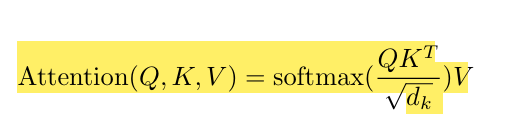

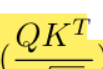

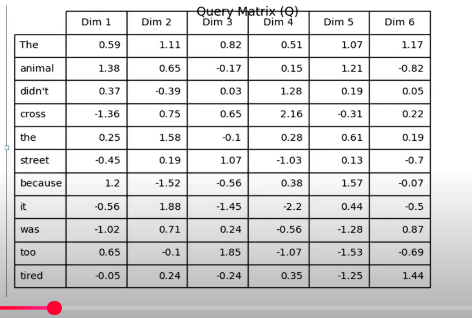

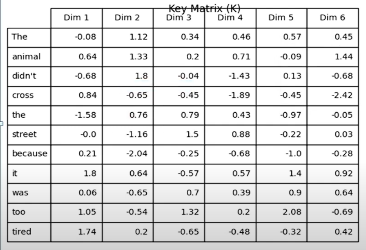

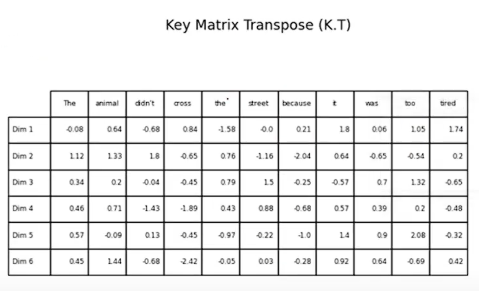

In [ ]:
q.shape

(11, 6)

In [ ]:
k.shape

(11, 6)

In [ ]:
q.shape, k.shape

((11, 6), (11, 6))

In [ ]:
k

array([[-0.34171794,  1.65512974,  0.55894166, -0.81855166,  1.61125369,
        -0.69458491],
       [ 0.27974394, -2.02203787,  0.20591087, -0.39073868,  0.81947964,
         0.66298787],
       [ 0.13717301,  0.43802875,  1.02402868, -1.30358094,  1.46101225,
         0.52859208],
       [ 0.20592746,  0.31283628, -1.07191821, -0.86059127, -0.46084151,
        -0.10708761],
       [ 1.991143  ,  0.47468849, -0.92934903,  0.32344088,  1.35809464,
        -1.05100551],
       [-0.68956804,  1.97730298, -0.70169233, -0.44539849,  0.05501213,
         1.64759594],
       [-1.21952208,  1.42007943, -0.43815498, -0.73295628,  0.31921096,
         1.32848754],
       [ 0.32182213,  0.1232747 , -0.31086015,  1.18990948,  0.61113609,
         1.04672141],
       [ 0.85876102,  0.76913921,  0.04504655,  1.46379851, -0.75828324,
         0.21628213],
       [-1.6253712 , -1.59598903,  0.06194497, -1.27354861,  0.27870859,
         0.64688418],
       [-0.45129727, -1.37962505, -0.30354591, -0.

In [ ]:
k = k.mT
k


array([[-0.34171794,  0.27974394,  0.13717301,  0.20592746,  1.991143  ,
        -0.68956804, -1.21952208,  0.32182213,  0.85876102, -1.6253712 ,
        -0.45129727],
       [ 1.65512974, -2.02203787,  0.43802875,  0.31283628,  0.47468849,
         1.97730298,  1.42007943,  0.1232747 ,  0.76913921, -1.59598903,
        -1.37962505],
       [ 0.55894166,  0.20591087,  1.02402868, -1.07191821, -0.92934903,
        -0.70169233, -0.43815498, -0.31086015,  0.04504655,  0.06194497,
        -0.30354591],
       [-0.81855166, -0.39073868, -1.30358094, -0.86059127,  0.32344088,
        -0.44539849, -0.73295628,  1.18990948,  1.46379851, -1.27354861,
        -0.33056529],
       [ 1.61125369,  0.81947964,  1.46101225, -0.46084151,  1.35809464,
         0.05501213,  0.31921096,  0.61113609, -0.75828324,  0.27870859,
         0.42622258],
       [-0.69458491,  0.66298787,  0.52859208, -0.10708761, -1.05100551,
         1.64759594,  1.32848754,  1.04672141,  0.21628213,  0.64688418,
         2.106

In [ ]:
k.shape

(6, 11)

In [ ]:
dot_product = np.matmul(q,k)
dot_product

array([[ 3.07608522e+00,  1.52759410e-01,  2.28527464e+00,
         1.12810493e+00,  7.21073429e+00, -2.87861918e+00,
        -3.26928267e+00, -1.33322783e+00, -2.37743128e-01,
        -3.67942139e+00, -3.85650169e+00],
       [-1.38571215e+00, -1.21244360e+00, -2.12162475e+00,
        -8.79854045e-01,  1.13137140e+00, -2.81204898e+00,
        -3.27222166e+00, -1.17156597e-01,  2.50467650e+00,
        -3.19366910e+00, -2.92775399e+00],
       [ 2.69895261e-01,  1.24450481e+00, -8.61479333e-01,
         7.81280303e-02,  3.87084835e+00, -1.74117407e+00,
        -1.49835019e+00,  1.21868969e+00, -4.26261796e-01,
        -4.48902289e-01, -7.40783055e-02],
       [ 1.61334074e+00, -4.68359941e-01,  8.95860061e-01,
        -8.87866626e-01,  7.85329069e+00, -1.04910031e+00,
        -2.83712494e+00,  2.95806657e+00,  3.69133475e+00,
        -6.89503938e+00, -2.59192525e+00],
       [-5.74599627e+00,  7.90175637e-01, -3.21234496e+00,
         3.83349436e-01, -6.80979015e+00, -3.72005582e-01,
  

In [ ]:
dot_product.shape

(11, 11)

In [ ]:
q.var(), k.var(), dot_product.var()

(np.float64(1.3602448357224624),
 np.float64(0.9442227047054744),
 np.float64(9.182309658881474))

In [ ]:
#d_k = 6
scaled = dot_product
q.var(), k.var(), scaled.var()

# we get high variance if we dont scale it (divide it)

(np.float64(1.3602448357224624),
 np.float64(0.9442227047054744),
 np.float64(9.182309658881474))

In [ ]:
#d_k = 6
scaled = dot_product / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(np.float64(1.3602448357224624),
 np.float64(0.9442227047054744),
 np.float64(1.5303849431469128))

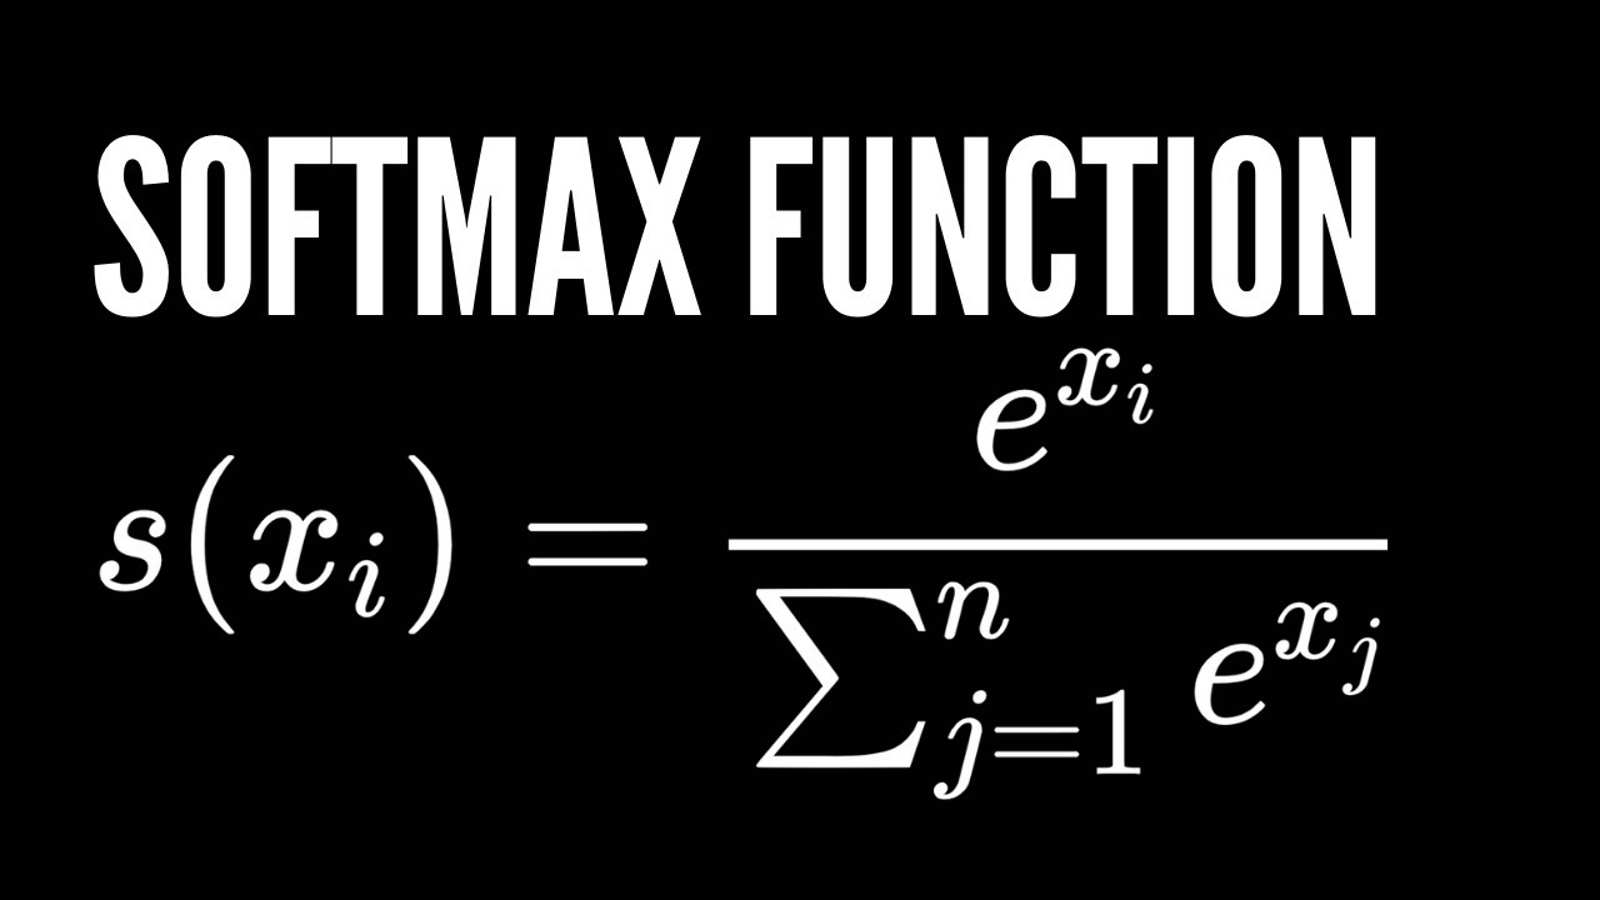

In [ ]:
def softmax(x):
  return (np.exp(x).mT / np.sum(np.exp(x), axis=1)).mT

In [ ]:
attention = softmax(scaled)
attention

array([[0.11632889, 0.03526809, 0.08423196, 0.05251831, 0.62915953,
        0.01023101, 0.00872276, 0.01922722, 0.03007086, 0.00737796,
        0.00686341],
       [0.06475194, 0.06949815, 0.04794855, 0.07960519, 0.18093876,
        0.03617123, 0.02997607, 0.1086845 , 0.31697031, 0.03095295,
        0.03450236],
       [0.07599228, 0.11312738, 0.0478825 , 0.07026987, 0.33053571,
        0.03343543, 0.03691982, 0.11194139, 0.05719273, 0.05666654,
        0.06603634],
       [0.04978614, 0.02128252, 0.0371449 , 0.01793265, 0.63599173,
        0.01679027, 0.00809172, 0.08620418, 0.1162885 , 0.00154374,
        0.00894365],
       [0.00694413, 0.10011076, 0.01953592, 0.08479114, 0.00449787,
        0.06229111, 0.07155457, 0.04343419, 0.07388614, 0.30326434,
        0.22968983],
       [0.27592022, 0.03942155, 0.13036392, 0.04476801, 0.07493267,
        0.06591898, 0.0738948 , 0.07338889, 0.15316476, 0.04485864,
        0.02336756],
       [0.33550865, 0.00317539, 0.07304127, 0.02292109, 0.

In [ ]:
attention.shape

(11, 11)

we have completed this part <br> 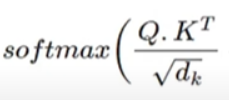

now let us dot product attention with V

In [ ]:
v

array([[ 0.13702004, -0.60753053,  0.21349135,  0.68559222, -1.10257948,
        -1.01453905],
       [ 0.12479323, -0.69068071, -1.74411516,  0.93496651,  0.17747239,
        -0.17381928],
       [-1.08873626,  0.14909643, -1.31236751, -1.73533086,  0.26459957,
        -0.22978506],
       [ 1.06719767, -0.49517084,  0.4429207 ,  0.64834188,  0.22611791,
         0.03206804],
       [ 0.30390445,  1.3495466 ,  0.25556354, -0.09021859, -0.31884489,
         1.67745952],
       [-2.17207147, -0.36434336, -3.33273557, -0.20315834, -0.24901994,
        -0.25320608],
       [-0.15359023,  0.45977557, -0.17107333, -0.30273038, -0.69173776,
         0.96231139],
       [-0.83754552,  0.3324172 , -0.78864447, -2.25432121,  1.40663872,
         0.16245573],
       [-0.07839374, -0.29824131,  1.33098305, -0.50160408, -0.02288729,
        -0.89434271],
       [ 1.76840449,  0.83244123, -0.23688222, -0.49802765,  0.49038385,
        -0.11262485],
       [ 0.49910314, -1.67888058, -0.33655933, -0.

now, let us complete the full formula

In [ ]:
v.shape

(11, 6)

In [ ]:
new_attention = np.matmul(attention, v)
new_attention

array([[ 0.15033553,  0.73292577,  0.02204522, -0.12457647, -0.27216269,
         0.90497281],
       [-0.02180521,  0.03461592,  0.10273235, -0.38243846,  0.01929548,
         0.01894365],
       [ 0.10447577,  0.25536564, -0.29388135, -0.25212016, -0.0396573 ,
         0.53482753],
       [ 0.06962007,  0.78785932,  0.12131704, -0.31755774, -0.13710253,
         0.93133943],
       [ 0.54650278, -0.23693261, -0.46495124, -0.25488409,  0.00503064,
         0.28266424],
       [-0.16567003, -0.10967915, -0.24679658, -0.28375801, -0.23971633,
        -0.23056508],
       [-0.35494531, -0.09300189, -0.70063601, -0.04942357, -0.57821188,
        -0.09148117],
       [-0.24770178, -0.19701544, -0.81501623, -0.36823075, -0.10048443,
         0.29145656],
       [-0.26896243, -0.0579416 , -0.82072902, -0.37171013, -0.17464799,
         0.15422484],
       [-0.01216765, -0.2764828 , -0.81394859, -0.47072481, -0.08185872,
         0.25787159],
       [-0.1714862 , -0.21930826, -0.45437249,  0.

## Decoder part (masked multi-head attention)

Now let us make attention with masking

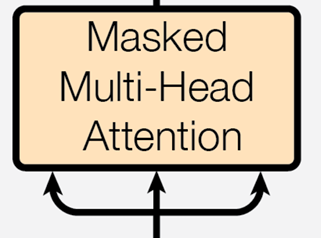

**Attention with masking**

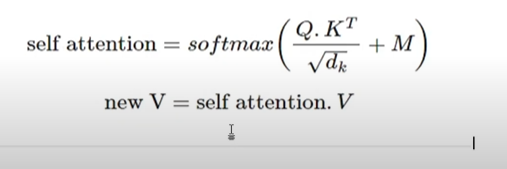

In [ ]:
mask=np.tril(np.ones((L,L))) # 11 x 11
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
mask.shape

(11, 11)

In [ ]:
mask[mask==0]=-np.inf
mask[mask==1]= 0

In [ ]:
mask

array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
#d_k = 6
scaled = dot_product / math.sqrt(d_k)


In [ ]:
scaled

array([[ 1.25580653e+00,  6.23637680e-02,  9.32959466e-01,
         4.60546909e-01,  2.94376995e+00, -1.17519136e+00,
        -1.33467906e+00, -5.44287984e-01, -9.70582254e-02,
        -1.50211749e+00, -1.57441022e+00],
       [-5.65714618e-01, -4.94978027e-01, -8.66149677e-01,
        -3.59198910e-01,  4.61880441e-01, -1.14801419e+00,
        -1.33587890e+00, -4.78289806e-02,  1.02252990e+00,
        -1.30380995e+00, -1.19525056e+00],
       [ 1.10184279e-01,  5.08066961e-01, -3.51697465e-01,
         3.18956348e-02,  1.58026722e+00, -7.10831337e-01,
        -6.11698904e-01,  4.97527984e-01, -1.74020649e-01,
        -1.83263592e-01, -3.02423416e-02],
       [ 6.58643599e-01, -1.91207145e-01,  3.65733338e-01,
        -3.62470032e-01,  3.20609250e+00, -4.28293409e-01,
        -1.15825141e+00,  1.20762562e+00,  1.50698110e+00,
        -2.81488804e+00, -1.05814905e+00],
       [-2.34579315e+00,  3.22587853e-01, -1.31143434e+00,
         1.56501752e-01, -2.78008519e+00, -1.51870643e-01,
  

In [ ]:
scaled + mask

array([[ 1.25580653,        -inf,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [-0.56571462, -0.49497803,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.11018428,  0.50806696, -0.35169746,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.6586436 , -0.19120715,  0.36573334, -0.36247003,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [-2.34579315,  0.32258785, -1.31143434,  0.15650175, -2.78008519,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 1.02242554, -0.92337371,  0.27264374, -0.79619249, -0.28109627,
        -0.40925975,        -inf,        -inf,        -inf,        -inf,
              

In [ ]:
mask_attention = softmax(scaled+ mask)
mask_attention

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.48232322, 0.51767678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.32063961, 0.47732637, 0.20203401, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.39467015, 0.1687131 , 0.29445909, 0.14215766, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.03216663, 0.46373375, 0.09049444, 0.39277011, 0.02083507,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.43704917, 0.06244252, 0.20649246, 0.07091115, 0.11869105,
        0.10441365, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.36051396, 0.00341205, 0.078485  , 0.02462938, 0.

In [ ]:
mask_attention.shape

(11, 11)

In [ ]:
new_mask_attention = np.matmul(mask_attention, v)
new_mask_attention

array([[ 0.13702004, -0.60753053,  0.21349135,  0.68559222, -1.10257948,
        -1.01453905],
       [ 0.13069051, -0.65057544, -0.79991608,  0.8146875 , -0.43992635,
        -0.57931795],
       [-0.1164606 , -0.49435592, -1.02920125,  0.31551635, -0.2153603 ,
        -0.45469433],
       [-0.093746  , -0.38279057, -0.53347038,  0.00950669, -0.29515515,
        -0.49283745],
       [ 0.38924895, -0.49271218, -0.74140904,  0.55136053,  0.15294766,
        -0.08648909],
       [-0.27218589, -0.19083772, -0.57283669,  0.01374046, -0.46397264,
        -0.3267708 ],
       [-0.48650522, -0.13385753, -0.73324619, -0.01025374, -0.64957478,
        -0.10603671],
       [-0.59995636,  0.01112338, -1.13066307, -0.37280614, -0.03279851,
         0.18123817],
       [-0.67526798, -0.03735089, -0.96390721, -0.36536028, -0.22412766,
         0.0623284 ],
       [-0.14736791,  0.09436676, -0.94018924, -0.5335115 ,  0.09348038,
        -0.06702043],
       [-0.1714862 , -0.21930826, -0.45437249,  0.

In [ ]:
new_mask_attention.shape

(11, 6)

# **Multi-Head Attention**

### My Code

The animal didn't cross the street because it was too tired

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [ ]:
sequence_length = 11
batch_size = 1
input_dim = 512
d_model = 512
t = torch.randn(batch_size,sequence_length, input_dim)
t

tensor([[[ 0.4476,  0.9676,  2.4188,  ..., -0.7298, -0.5840, -0.0202],
         [ 0.1623, -0.4816,  0.1608,  ..., -0.7487, -1.1642,  0.2358],
         [ 2.3766,  0.0090,  0.2465,  ..., -0.0943,  0.7416,  1.6330],
         ...,
         [-0.8811,  0.4586,  0.7799,  ..., -0.1049,  0.1147,  1.6073],
         [-1.2455,  0.9475, -0.4014,  ..., -1.1010, -0.3733,  0.2131],
         [ 0.4451,  0.4522,  0.2670,  ..., -0.3169,  1.7915, -0.2162]]])

In [ ]:
t.shape

torch.Size([1, 11, 512])

In [ ]:
qkv_layers = nn.Linear(input_dim, 3 * d_model)
#(512, 3 * 512)
#dimensions of input and model is 512 -
# as there are three items qkv)- we are multiplying it by 3

In [ ]:
qkv_layers

Linear(in_features=512, out_features=1536, bias=True)

In [ ]:
qkv = qkv_layers(t)

In [ ]:
qkv.shape

torch.Size([1, 11, 1536])

In [ ]:
d_model

512

In [ ]:
num_of_heads = 8 # the number of head depends on us
head_dim = d_model// num_of_heads  # 512 / 8 = 64

In [ ]:
head_dim

64

In [ ]:
qkv.shape

torch.Size([1, 11, 1536])

In [ ]:
t = torch.rand(10,2) # 10 rows, 2 cols
t

tensor([[0.5445, 0.2227],
        [0.9305, 0.0667],
        [0.1332, 0.6732],
        [0.5364, 0.5502],
        [0.8390, 0.6619],
        [0.3256, 0.1193],
        [0.4570, 0.4750],
        [0.4223, 0.2553],
        [0.5919, 0.8124],
        [0.3059, 0.1701]])

In [ ]:
t.shape

torch.Size([10, 2])

In [ ]:
t.reshape(5,4) # 5 rows, 4 cols  {we could also write - (2,5,2)}

tensor([[0.5445, 0.2227, 0.9305, 0.0667],
        [0.1332, 0.6732, 0.5364, 0.5502],
        [0.8390, 0.6619, 0.3256, 0.1193],
        [0.4570, 0.4750, 0.4223, 0.2553],
        [0.5919, 0.8124, 0.3059, 0.1701]])

In [ ]:
t.shape

torch.Size([10, 2])

Now let us work with qkv

In [ ]:
#sequence_length = 11
#batch_size = 1
#input_dim = 512
#d_model = 512
# written this code above
# head_dim = 64

qkv = qkv.reshape(batch_size, sequence_length, num_of_heads, 3 * head_dim )

In [ ]:
qkv.shape # 512/8 =64 = (q,k,v)- each one will get 64 (64*3=192)

torch.Size([1, 11, 8, 192])

In [ ]:
# we could also write

In [ ]:
# qkv = qkv.reshape(batch_size, sequence_length, 2, 768 )

In [ ]:
# qkv.shape

In [ ]:
# the output would have been like this

# torch.Size([1, 11, 8, 192])

we are going to use permute <br><br>
permute is used to change the position of the dimension

In [ ]:
# commented out
# torch.Size([1, 11, 8, 192])
# position  = index - so 0,1,2,3

In [ ]:
# commented out
# qkv = qkv.permute(3,2,1,0)

In [ ]:
# commented out
# qkv.shape

In [ ]:
# commented out
# see- first the shape was like this -
# [1, 11, 8, 192]
# after permuting it became like this
# [192, 8, 11, 1]

In [ ]:
qkv = qkv.permute(0,2,1,3)

In [ ]:
qkv.shape

torch.Size([1, 8, 11, 192])

now we want to sepeare q,k,v from the last dimension (192) <br> <br>

we can do it by using chunk - <br> <br>

q,k,v = qkv.chunk(3, dim=-1)

here, 3 = number of segments we want
dim = which dimension we want to break

In [ ]:
q,k,v = qkv.chunk(3, dim=-1) # last dimension

In [ ]:
q.shape, k.shape, v.shape

(torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]))

Well, we have q,k,v(1536) - 512 * 8 = 1536
<br>
Too much computation- so what we <br>
 can do is, we can segment the total dimension of each items-

(refer to the paper for this)

Q = 512 | 64=1, 64=2, 64=3, 64=4, 64=5, 65=6, 65=7, 65=8 <br> <br>

K = 512 | 64=1, 64=2, 64=3, 64=4, 64=5, 65=6, 65=7, 65=8 <br> <br>

V = 512 | 64=1, 64=2, 64=3, 64=4, 64=5, 65=6, 65=7, 65=8 <br> <br>

Let us now focus on the main equation of multi-head attention

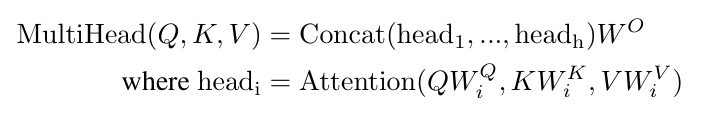

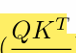

In [ ]:
q.shape

torch.Size([1, 8, 11, 64])

In [ ]:
k.shape

torch.Size([1, 8, 11, 64])

In [ ]:
k.mT
k.mT.shape

torch.Size([1, 8, 64, 11])

as we can see, the k has been transposed
<br> if we notice carefully, all the values
inside k has been reversed.<br>
 however, we only want to reverse the last two index (dimension)

In [ ]:
k.shape

torch.Size([1, 8, 11, 64])

In [ ]:
k.transpose(-2,-1).shape

torch.Size([1, 8, 64, 11])

In [ ]:
trans = torch.matmul(q,k.transpose(-2,-1))

In [ ]:
trans

tensor([[[[-2.9899e+00, -3.7928e+00, -1.3540e+00,  1.4473e+00, -1.8382e+00,
            2.2174e+00,  6.8010e-01, -9.5166e-01,  1.5630e+00, -4.7084e+00,
           -1.0588e+00],
          [-7.1792e+00,  3.4001e-01,  3.4657e+00, -2.9485e+00, -8.7324e-01,
           -3.3438e-01,  2.1537e+00,  3.0235e+00, -3.3944e-01,  6.1811e-01,
            1.5436e+00],
          [ 2.7469e-01, -1.2752e+00, -1.3017e+00, -3.0383e+00,  1.6376e+00,
            1.1263e+00,  4.0591e+00, -5.5448e+00, -2.2269e+00,  1.8981e+00,
            4.4839e-01],
          [ 4.9295e-01,  3.6466e-01,  1.3466e-01, -3.6494e+00, -7.8589e-01,
            1.9186e+00,  5.7678e-01, -8.6516e-01,  3.2040e-02, -2.4651e-01,
           -2.8433e-01],
          [ 2.6972e+00, -1.8817e-01,  2.4434e-01, -2.2144e+00, -3.3581e+00,
            8.1865e-01,  3.5144e+00, -2.4797e+00, -4.0312e+00, -1.4988e+00,
            5.8541e-01],
          [ 1.5223e+00, -1.1089e+00, -1.9021e+00,  6.6486e-01,  1.1448e+00,
            7.9444e-01, -2.3267e+00, -2

In [ ]:
trans.shape

torch.Size([1, 8, 11, 11])

In [ ]:
k.size()

torch.Size([1, 8, 11, 64])

In [ ]:
d_k= k.size()[-1]

In [ ]:
d_k

64

now we need to scale it

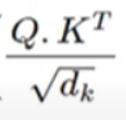

In [ ]:
q.shape

torch.Size([1, 8, 11, 64])

In [ ]:
k.shape

torch.Size([1, 8, 11, 64])

In [ ]:
scaled = torch.matmul(q,k.transpose(-2,-1)) / math.sqrt(d_k)

In [ ]:
scaled

tensor([[[[-3.7374e-01, -4.7410e-01, -1.6925e-01,  1.8091e-01, -2.2977e-01,
            2.7717e-01,  8.5013e-02, -1.1896e-01,  1.9537e-01, -5.8855e-01,
           -1.3235e-01],
          [-8.9740e-01,  4.2502e-02,  4.3321e-01, -3.6856e-01, -1.0915e-01,
           -4.1797e-02,  2.6921e-01,  3.7794e-01, -4.2430e-02,  7.7264e-02,
            1.9295e-01],
          [ 3.4336e-02, -1.5940e-01, -1.6271e-01, -3.7979e-01,  2.0470e-01,
            1.4079e-01,  5.0739e-01, -6.9310e-01, -2.7836e-01,  2.3726e-01,
            5.6048e-02],
          [ 6.1618e-02,  4.5583e-02,  1.6832e-02, -4.5617e-01, -9.8237e-02,
            2.3983e-01,  7.2098e-02, -1.0815e-01,  4.0049e-03, -3.0814e-02,
           -3.5542e-02],
          [ 3.3715e-01, -2.3522e-02,  3.0542e-02, -2.7680e-01, -4.1976e-01,
            1.0233e-01,  4.3930e-01, -3.0996e-01, -5.0390e-01, -1.8735e-01,
            7.3176e-02],
          [ 1.9028e-01, -1.3862e-01, -2.3776e-01,  8.3108e-02,  1.4311e-01,
            9.9305e-02, -2.9084e-01, -3

In [ ]:
scaled.shape

torch.Size([1, 8, 11, 11])

here, we did the multiplication for all <br> the heads in the batch ( for now we <br> have 1 batch)- we scaled all of <br> them- not for only 1 single attention

now let us make the Masked- multi-head attention

In [ ]:
mask = torch.full(scaled.size(),float('-inf'))
mask

tensor([[[[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -in

In [ ]:
mask.shape

torch.Size([1, 8, 11, 11])

In [ ]:
new_mask = torch.triu(mask,diagonal=1)
new_mask

tensor([[[[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., -inf, -inf, -inf, -inf,

In [ ]:
# let us mask for single head
new_mask[0][0]

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
scaled + new_mask

tensor([[[[-3.7374e-01,        -inf,        -inf,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-8.9740e-01,  4.2502e-02,        -inf,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [ 3.4336e-02, -1.5940e-01, -1.6271e-01,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [ 6.1618e-02,  4.5583e-02,  1.6832e-02, -4.5617e-01,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [ 3.3715e-01, -2.3522e-02,  3.0542e-02, -2.7680e-01, -4.1976e-01,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [ 1.9028e-01, -1.3862e-01, -2.3776e-01,  8.3108e-02,  1.4311e-01,
            9.9305e-02,        -inf,   

In [ ]:
(scaled + new_mask).shape

torch.Size([1, 8, 11, 11])

In [ ]:
(scaled + new_mask)[0][0]

tensor([[-3.7374e-01,        -inf,        -inf,        -inf,        -inf,
                -inf,        -inf,        -inf,        -inf,        -inf,
                -inf],
        [-8.9740e-01,  4.2502e-02,        -inf,        -inf,        -inf,
                -inf,        -inf,        -inf,        -inf,        -inf,
                -inf],
        [ 3.4336e-02, -1.5940e-01, -1.6271e-01,        -inf,        -inf,
                -inf,        -inf,        -inf,        -inf,        -inf,
                -inf],
        [ 6.1618e-02,  4.5583e-02,  1.6832e-02, -4.5617e-01,        -inf,
                -inf,        -inf,        -inf,        -inf,        -inf,
                -inf],
        [ 3.3715e-01, -2.3522e-02,  3.0542e-02, -2.7680e-01, -4.1976e-01,
                -inf,        -inf,        -inf,        -inf,        -inf,
                -inf],
        [ 1.9028e-01, -1.3862e-01, -2.3776e-01,  8.3108e-02,  1.4311e-01,
          9.9305e-02,        -inf,        -inf,        -inf,        -in

now let us apply softmax

In [ ]:
scaled.shape

torch.Size([1, 8, 11, 11])

we need to apply softmax to the last index(dimension)

In [ ]:
attention = F.softmax(scaled, dim = -1)

In [ ]:
attention.shape

torch.Size([1, 8, 11, 11])

In [ ]:
attention[0][0]

tensor([[0.0682, 0.0617, 0.0837, 0.1188, 0.0788, 0.1308, 0.1079, 0.0880, 0.1205,
         0.0550, 0.0868],
        [0.0353, 0.0903, 0.1334, 0.0598, 0.0776, 0.0830, 0.1132, 0.1262, 0.0829,
         0.0935, 0.1049],
        [0.0937, 0.0772, 0.0770, 0.0619, 0.1111, 0.1042, 0.1504, 0.0453, 0.0686,
         0.1148, 0.0958],
        [0.0980, 0.0965, 0.0937, 0.0584, 0.0835, 0.1172, 0.0991, 0.0827, 0.0925,
         0.0894, 0.0890],
        [0.1306, 0.0911, 0.0961, 0.0707, 0.0613, 0.1033, 0.1447, 0.0684, 0.0563,
         0.0773, 0.1003],
        [0.1074, 0.0773, 0.0700, 0.0965, 0.1025, 0.0981, 0.0664, 0.0631, 0.0763,
         0.0768, 0.1656],
        [0.0877, 0.0926, 0.0465, 0.0429, 0.1064, 0.1026, 0.1265, 0.0722, 0.0913,
         0.1413, 0.0901],
        [0.1033, 0.0630, 0.1234, 0.0791, 0.1204, 0.0779, 0.0985, 0.0713, 0.0930,
         0.1058, 0.0643],
        [0.1237, 0.0884, 0.0681, 0.0988, 0.0764, 0.0966, 0.0878, 0.0808, 0.1050,
         0.1178, 0.0566],
        [0.0772, 0.0958, 0.1136, 0.14

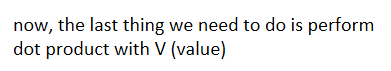

In [ ]:
v.shape

torch.Size([1, 8, 11, 64])

In [ ]:
values = torch.matmul(attention, v)

In [ ]:
values.shape

torch.Size([1, 8, 11, 64])

#

### My code part 2 - Main code (actual multi-head attenntion class)

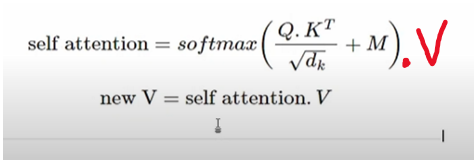

In [ ]:
class MultiHeadAttentionBlock(nn.Module):
  def __init__(self, d_model:int, attention_heads:int, dropout:float) ->None:
    # By indicating none- we are saying that - nothing is being returned

    # {start}
    super().__init__()
    self.d_model = d_model
    self.attention_heads = attention_heads
    assert d_model % attention_heads ==0, 'd_model is not divisible by attention_heads'
    # we did this because, if a remainder remains, this would create an issue
    # {end}


    # {start}
    # d_k = 512  (number of dimensions our attention heads would have)
    # so for single attention head - d_k = 512
    # however, we have divided/segmented our attention heads by 8
    # so, now,d_k =  512/8 =64
    # d_k = 64
    self.d_k = d_model // attention_heads   #  = 64
    # {end}


    # {start}
    # in our previous code - we wrote something like this
    # qkv_layer = nn.Linear(input_dim, 3 * d_model)
    # we multiplied d_model with 3 because we were calculating
    # all the items (Q,K,V)
    # however, now, we are calculating them seperately
    # {end}
    self.w_q = nn.Linear(d_model, d_model)
    # inside the bracket- we will have (512,512) # w= weight
    self.w_k = nn.Linear(d_model, d_model) # (512,512)
    self.w_v = nn.Linear(d_model, d_model) # (512,512)
    # {start}
    # both our input dimensions and embedding dimensions
    # is 512.
    # {end}


    # {start}
    # we need to make sure the output we get from the entire
    # encoder block is 512. Hence,
    self.w_output = nn.Linear(d_model, d_model)
    # {end}

    self.dropout=nn.Dropout(dropout) # to reduce overfitting

    # this will not work untill we use forward method


  @staticmethod # by using this, we do need to need to create instances
  def attention(query, key, value, mask, dropout:nn.Dropout):
    d_k =query.shape[-1] # [64]
    attention_score = (query @ key.transpose(-2,-1)) / math.sqrt(d_k) # (Q.K`T/sqrt(d_k))
    if mask is not None:
      attention_score.masked_fill_(mask==0, -1e9) # added M
    attention_score = (attention_score.softmax(dim=-1)) # applied softmax to the last dimension

      # this is to seperate attention and mask attention
    if dropout is not None:
      attention_score = dropout(attention_score)
    return (attention_score @ value), attention_score # we are applying multiplication with V


    # @ is used for multiplication -
    # same as matmul
    # transpose (-2,-1)
    # here we are targeting for last two index(dimensions)
    # we will keep the rest same as it is



  def forward(self,q,k,v,mask):
    # {start}
    # we got q,k,v after the input has
    # went through input embedding and
    # positional encoding block and
    # now being fed into
    # multi-head attention block
    # {end}

    query = self.w_q(q)
    # [1,11,512]
    # we will get Q (tensor of 512 dimension)

    key = self.w_k(k)
    # [1,11,512]
    # we will get Q (tensor of 512 dimension)
    value = self.w_v(v)
    # [1,11,512]
    # we will get Q (tensor of 512 dimension)
    # [1,11,512] = # (batch_size, sequence_length, dimension)
    # our batch size is 1 for now
    # it will get bigger once we have more sentences.


    # now, we also need to use transpose (to change position of the last two dimension)
    query = query.view(query.shape[0], query.shape[1], self.attention_heads, self.d_k).transpose(1,2)
    # now the shape is transformed into [1,8,11,64]
    # batch size, heads, sequence_length, dimensions
    # here  attention_heads==8 and d_k==64
    # so we broke down the 512 number into
    # attention_heads = 8 * d_ k = 64 ( 8 * 64 = 512)
    #

    # we will keep everything the same except for the last one
    # same as reshape - the only difference is
    # it also makes changes on original tensor
    # {inplace}

    # the rest will be same as query

    key = key.view(key.shape[0], key.shape[1], self.attention_heads, self.d_k).transpose(1,2)
    # [1,8,11,64]
    value = value.view(value.shape[0], value.shape[1], self.attention_heads, self.d_k).transpose(1,2)
    # [1,8,11,64]
    x, self.attention_score = MultiHeadAttentionBlock.attention(query, key, value, mask,self.dropout)
    # we are sending (query, key, value, mask, self.dropout) to the static method (named attention)
    # [1, 8, 11, 64]


    x = x.transpose(1,2).contiguous().view(x.shape[0], -1, self.attention_heads * self.d_k) # ( 8 * 64)
    # there was seperate 8  heads- we just concatenated them  (512)
    # contiguous ensures that the elements inside the tensor are stored in a single contiguous block of memory
    # from [1, 8, 11, 64]  to [1, 11, 8, 64]
    # now we have all the 8 heads (but seperately)
    # so we need to concatenate them

    # one important thing to remember
    # we feed the inputs as 512 dimension (break it down to 64 * 3 {for 3 heads})
    # and want our output to be of 512 dimensions again
    return self.w_output(x)


# **Layer Normalization**


why do we need it? <br>

because without it, our training would be slow and unstable

mean = 0, standard deviation = 1

image.png = gamma or alpha

image.png = Bita / Bias

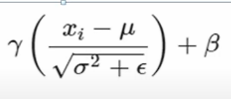

In [ ]:
class LayerNormalization(nn.Module):
  def __init__(self, epsilon:float=10**-6) ->None: # 1e-6  or # 0.000001
    super().__init__()
    self.epsilon = epsilon
    gamma = nn.Parameter(torch.ones(1))# learnable parameter # used to increase the spread of our data
    beta = nn.Parameter(torch.ones(0)) # learnable parameter #used to shift our data


  def forward(self, x):

    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True)
    return self.gamma * (x-mean) / (std + self.epsilon) + self.beta

    # this will also handle batch


# **Feed forward Network**


### My Code

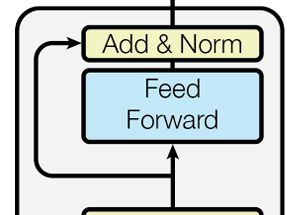
<br>
This consists of two linear transformations with a ReLU activation in between.<br>

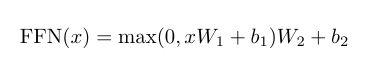

Input = 512 , Output = 512, d_model

**dff = 2048 **

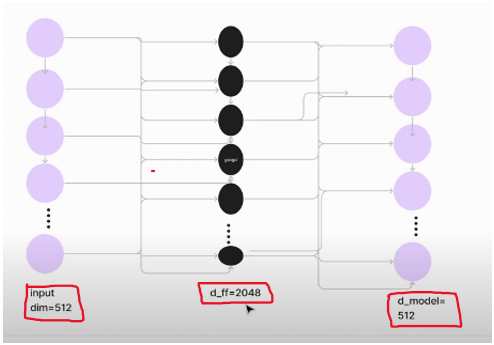

In [ ]:
class FeedForwardBlock(nn.Module):
  def __init__(self, d_model:int, d_ff:int, dropout:float ) ->None:
    super().__init__()
    self.Linear_1= nn.Linear(d_model, d_ff)
    # d_model=512 - the input neurons will be 512
    # inner neurons = 2048
    # output neurons = 512 again
    self.dropout= nn.Dropout(dropput)
    self.Linear_2 = nn.Linear(d_ff, d_model)

  def forward(self, x,):
   b = self.Linear_1(x)
   s = torch.relu(b)
   # relu - converts the negative numbers to 0 and keep the positive numbers as it is
   e = self.dropout(s)
   z = self.Linear_2(e)
   return z




other way of writing this code

professional way of writing it

In [ ]:
class FeedForwardBlock(nn.Module):
  def __init__(self, d_model:int, d_ff:int, dropout:float ) ->None:
    super().__init__()
    self.linear_1= nn.Linear(d_model, d_ff)
    # d_model=512 - the input neurons will be 512
    # inner neurons = 2048
    # output neurons = 512 again
    self.dropout= nn.Dropout(dropput)
    self_linear_2 = nn.Linear(d_ff, d_model)

  def forward(self, x,):
    return self_linear_2(self.dropout(torch.relu(self.linear_1(x))))

# **Residual Connection**


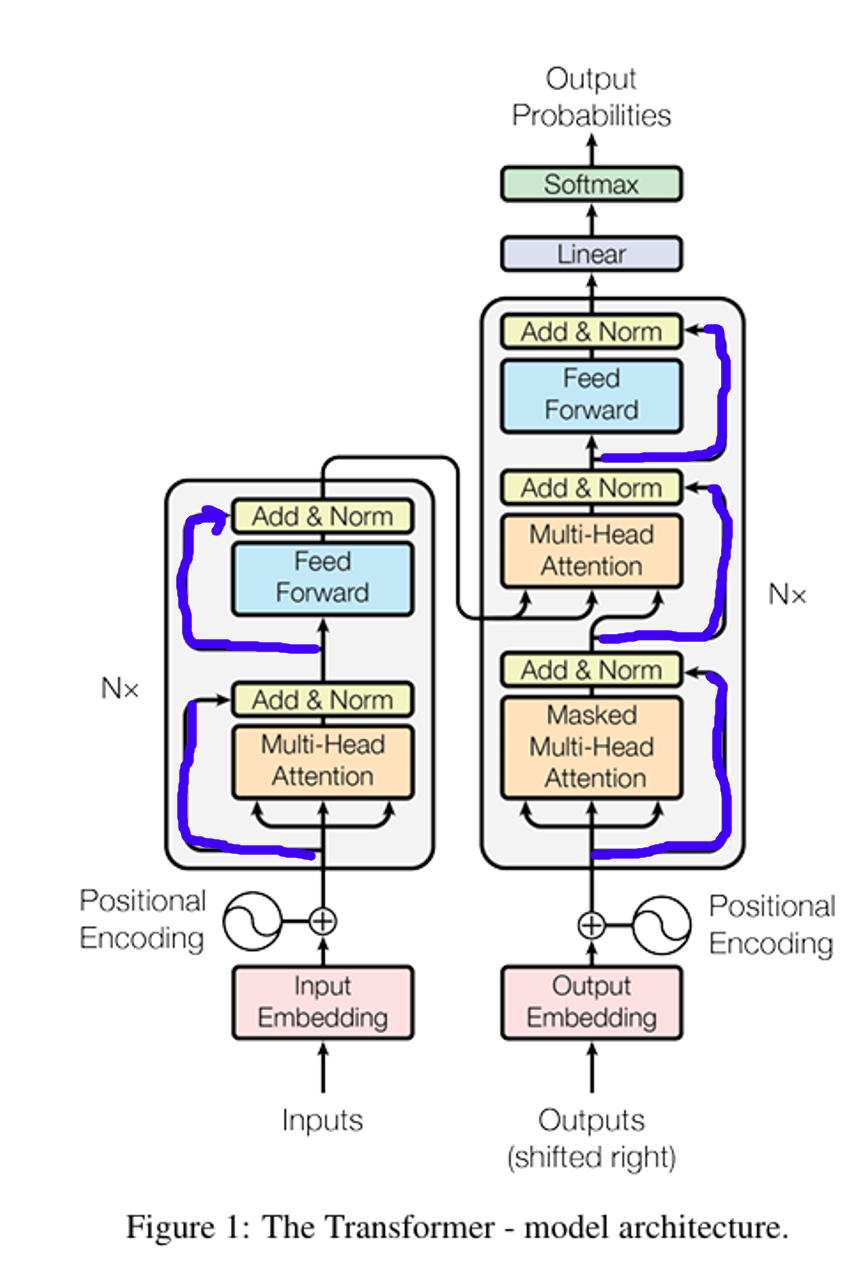

### My Code

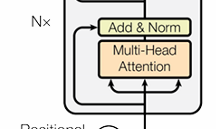

for our model, residual is used to reduce vanishing gradient problem and to hold onto some information that we might lose along the way (sometime we lose information when the input go through each block)



**LayerNorm(x + Sublayers(x))**

In [ ]:
class ResidualConnection(nn.Module):
  def __init__(self, dropout:float ) ->None:
    super().__init__()
    self.dropout = nn.Dropout(dropout)
    self.norm = LayerNormalization()
    # we are now calling Layer Normalization layer that we made


  def forward(self, x, sublayer):
    # return x + self.dropout(self.norm(sublayer(x)) )   # x = input
    # we do not use this now



    # return self.norm(x + sublayer(x)) # Researchers recommned this code

    # we are first normalizing the input that will go through our layers
    return x + self.dropout(sublayer(self.norm(x)))
    # hwoever, this is the best one to use


# **Encoder**


**stack of N = 6 identical layers** <br>

**Each later has two sub-layers**

### My Code

**d_model= 512**

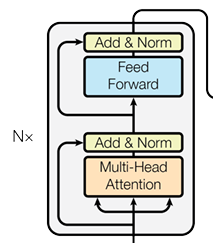

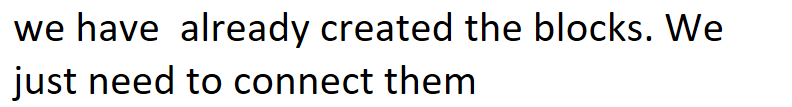

In [ ]:
for i in range(2):
  print(i)

0
1


In [ ]:
for _ in range(2):
  print("GG")

GG
GG


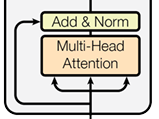

this is one sub layer (where we have multi-head attention layer + normaliaation + add)

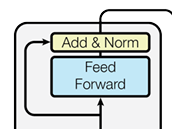


this is another sub layer (where we have feed forward layer + normaliaation + add)

 we just  need to indicate which sublayer we are trying to use (and name it as such)


In [ ]:
class EncoderBlock(nn.Module): #this is just 1 block - not the whole encoder
   def __init__(self, self_attention_block:MultiHeadAttentionBlock, feed_forward_block:FeedForwardBlock,dropout:float) -> None:
    # we already have MultiHeadAttentionBlock, FeedForwardBlock and  ResidualConnection class - above us
    super().__init__()
    self.self_attention_block = self_attention_block
    self.feed_forward_block = feed_forward_block
    self.dropout = dropout

    # in the residual block (we already have normaliaaation- we can only use the residual)
    # we will be needing 2 residua connection


    self.residual_connection = nn.ModuleList([ResidualConnection(dropout) for _ in range(2)]) # it will run for 2 times
    # we have created two instances on index 0 and 1
    # nn.ModuleList is a container module in PyTorch, which can store  any subclass of  nn.Module.
    # it also store the order
    # we are using nn.ModuleList - so that parameters of the subclasses (e.g.ResidualConnection ) - also get train in backpropagation
    # without it, the parameters will be be usable - train


   def forward (self, input, src_mask): # src_mask = we will put masking on the padded tokens  [see note for more info]
    #  when we call residual connection - we actually call the whole sub layers (it can be multi-head or feed forward block)
    x = self.residual_connection[0](x, lambda x:self.self_attention_block(x,x,x, src_mask)) # syntax - lambda input expression
    # syntax (for residual connection) - input, sublayer
    # self attentions wants  q,k,v and mask - and we are sending x to each of them- so x,x,x- we also want mask for padding
    x = self.residual_connection[1](x, self.feed_forward_block) # we got this input"d" from the previous line of code - after it went through the residual connection
    return x



In [ ]:
def my_func():
    for i in range(10):
        i = i + 1
        print(i)
    return i

print("Final Output: ", my_func())


1
2
3
4
5
6
7
8
9
10
Final Output:  10


In [ ]:
class Encoder(nn.Module):
  def __init__(self, layers:nn.ModuleList) -> None:
    super().__init__()
    self.layers = layers
    self.norm = LayerNormalization()
    # we need to normalize the output of the encoder (final output)

  def forward(self, x, mask):
    for layer in self.layers:
      x=layer(x,mask) # note: mask is applied to the padded token
      # we are taking the maximum tokens - (from maximum sentence length)
      # it will run 6 times (I suppose)
    return self.norm(x)






# **Decoder**

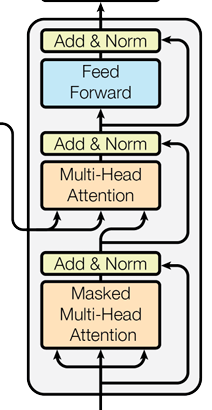

### My Code

In [ ]:
class DecoderBlock(nn.Module):
  def __init__(self, self_attention_block:MultiHeadAttentionBlock,
               cross_attention_block:MultiHeadAttentionBlock,
               feed_forward_block:FeedForwardBlock, dropout:float) -> None:

    super().__init__()
    self.self_attention_block = self_attention_block
    self.cross_attention_block = cross_attention_block
    self.feed_forward_block = feed_forward_block
    self.dropout = dropout
    self.residual_connection = nn.ModuleList([ResidualConnection(dropout) for _ in range(3)])

  def forward (self, x, encoder_output, src_mask, tgt_mask):
    x = self.residual_connection[0](x, lambda x:self.self_attention_block(x,x,x, tgt_mask))
    # src_mask = masking the items that we will get from encoder
    x = self.residual_connection[1](x, lambda x:self.cross_attention_block(x, encoder_output, encoder_output, src_mask))
    # encoder_output , encoder_output = means k and v is from encoder output- we gave them twice as we needed both k and v
    x = self.residual_connection[2](x, self.feed_forward_block)
    return x


In [ ]:
class Decoder(nn.Module):
  def __init__(self, layers:nn.ModuleList) -> None:
    super().__init__()
    self.layers = layers
    self.norm = LayerNormalization()
    # also, we need to normalize the output of the decoder (final output)


  def forward(self, x, encoder_output, src_mask, tgt_mask):
    for layer in self.layers:
      x=layer(x,encoder_output,src_mask,tgt_mask)

      # we are taking the maximum tokens - (from maximum sentence length)
      # it will run 6 times
    return self.norm(x)






# **Projection Layer**

## Linear Layer

### My code

In [ ]:
class ProjectionLayer(nn.Module):
  def __init__(self, d_model:int, vocab_size:int) -> None:
    super().__init__()

    self.projection = nn.Linear(d_model, vocab_size) #lets asumme (input, output)

  def forward(self, x):
    return torch.log_softmax(self.projection(x), dim =-1)
    #added log for numerical stability -speed improve

# **Building the main transformer**

## my code

In [ ]:
class Transformer(nn.Module):
  #encoder  = Encoder
  #all the parameters
  def __init__(self, encoder:Encoder,
               decoder:Decoder,
               src_embed:InputEmbedding,
               tgt_embed:InputEmbedding,
               src_pos:PositionalEncoding,
               tgt_pos:PositionalEncoding,
               projection_layer:ProjectionLayer):
    super().__init__()

    # now create all the instances so that we can use them
    self.encoder = encoder
    self.decoder = decoder
    self.src_embed = src_embed
    self.tgt_embed = tgt_embed
    self.src_pos = src_pos
    self.tgt_pos = tgt_pos
    self.projection_layer = projection_layer


  def encoder(self, src, src_mask):
    src = self.src_embed(src)
    src = self.src_pos(src)
    return self.endoer(src, src_mask)


  def decoder(self, encoder_output, src_mask, tgt, tgt_mask):
    tgt = self.embed(tgt)
    tgt = self.tgt_pos(tgt)
    return self.decoder(tgt, encoder_output, src_mask, tgt_mask)

  def project(self, x):
    return self.projection(x)
